In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.optim import Adam
from torchvision import datasets, transforms
from sklearn import datasets
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt

USE_CUDA = False

In [3]:
read_counts = pd.read_table('/Users/marong/Dropbox/CG_project/Capsnet/6k/data6k_norm_counts_all.txt')
cell_labels = pd.read_table('/Users/marong/Dropbox/CG_project/Capsnet/6k/data6k_celltypes.txt')
read_counts_2 = pd.read_table('/Users/marong/Dropbox/CG_project/Capsnet/8k/data8k_norm_counts_all.txt')
cell_labels_2 = pd.read_table('/Users/marong/Dropbox/CG_project/Capsnet/8k/data8k_celltypes.txt')

count_6k = read_counts.iloc[:,1:]
count_8k = read_counts_2.iloc[:,1:]

all_data = count_6k.append(count_8k, sort=False)
data_processed = all_data.loc[:,count_6k.columns]
data_processed = data_processed.fillna(0)
all_labels = list(cell_labels['Celltype']) + list (cell_labels_2['Celltype'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.


In [4]:
# SVM method for classification
x_tr = data_processed.iloc[:int(0.8*data_processed.shape[0]) , :].values
y_tr = all_labels[:int(0.8*len(all_labels))]
x_te = data_processed.iloc[int(0.8*data_processed.shape[0]):, :].values
y_te = all_labels[int(0.8*len(all_labels)):]

model = OneVsOneClassifier(LinearSVC(random_state = 0)).fit(x_tr,y_tr)
y_predict = model.predict(x_te)
accuracy_score(y_te, y_predict, normalize=True)   # 0.8761574074074074

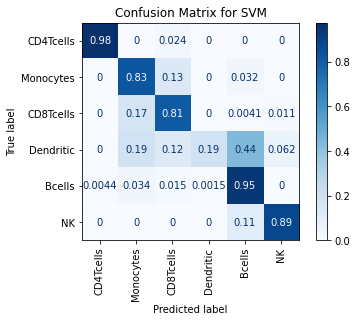

In [93]:
title = 'Confusion Matrix for SVM'

disp = plot_confusion_matrix(model, x_te, y_te,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true',
                                 xticks_rotation = 'vertical')
disp.ax_.set_title(title)
plt.show()

In [94]:
# Decision Tree for classification
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model.fit(x_tr, y_tr)
decision_tree_predict = decision_tree_model.predict(x_te)
print(accuracy_score(y_te, decision_tree_predict,normalize=True))

0.8499228395061729

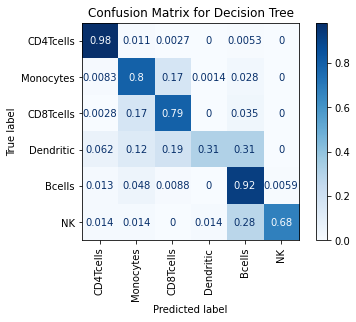

In [95]:
title = 'Confusion Matrix for Decision Tree'

disp_2 = plot_confusion_matrix(decision_tree_model, x_te, y_te,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true',
                                 xticks_rotation = 'vertical')
disp_2.ax_.set_title(title)
plt.show()

In [97]:
# KNN for classification
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(x_tr, y_tr)
neigh_y_predict = neigh.predict(x_te)
accuracy_score(y_te, neigh_y_predict, normalize=True)

0.8117283950617284

In [ ]:
title = 'Confusion Matrix for KNN'

disp_3 = plot_confusion_matrix(neigh, x_te, y_te,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true',
                                 xticks_rotation = 'vertical')
disp_3.ax_.set_title(title)
plt.show()